In [105]:
import pandas as pd
from numpy import nan
import seaborn as sns
from google.colab import drive
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Embedding
from keras.regularizers import l2

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/DL_Assignment_1/'  #change dir to your project folder
dataset= pd.read_csv('gdrive/My Drive/DL_Assignment_1/training.1600000.processed.noemoticon.csv', encoding='latin-1')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [106]:
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [107]:

tf.test.gpu_device_name()


'/device:GPU:0'

In [108]:
dataset.columns =['target', 'id', 'date', 'flag', 'user', 'text']

In [109]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [110]:
dataset.describe()

,target,id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [111]:
dataset.target.unique()

array([0, 4])

In [112]:
dataset.loc[dataset['target'] == 0]

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
799994,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799995,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799996,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799997,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


In [113]:
dataset.loc[dataset['target'] == 4]

,target,id,date,flag,user,text
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


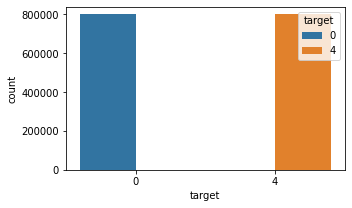

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
sns.countplot(data=dataset, x='target', hue='target')
plt.show()

In [115]:
dataset.shape

(1599999, 6)

In [116]:
#x = dataset.loc[ : ,'text']
#y = dataset.loc[ : ,'target']

In [117]:
#xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

In [118]:
#xtest.size

In [119]:
#import tensorflow.compat.v1 as tf
import tensorflow_hub as hub
#tf.compat.v1.disable_eager_execution()
#embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

#embeddings = embed(dataset['text'])
x = dataset['text']
y = dataset.loc[ : ,'target']


#with tf.Session() as sess:
#    sess.run(tf.global_variables_initializer())
#    sess.run(tf.tables_initializer())
#    x = embeddings.eval(sess)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain,test_size=0.2, random_state=0)

In [120]:
#tfidf = TfidfVectorizer(max_features = 600)
#X_train_tf = tfidf.fit_transform(xtrain).toarray() 
#X_test_tf = tfidf.transform(xtest).toarray()

In [121]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1023999,), (320000,), (1023999,), (320000,))

In [156]:
from tensorflow import keras
from tensorflow.keras import layers

hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2", input_shape=[], dtype=tf.string)
model=Sequential()
model.add(hub_layer)
model.add(Dense(512,input_shape=(600,), activation='relu')) #Input Neuron
#model.add(Dropout(0.3))
model.add(Dense(256,activation='relu')) #Hidden Neuron
#model.add(Dropout(0.3))
model.add(Dense(512,activation='relu')) #Hidden Neuron
#model.add(Dense(512,activation='relu', kernel_regularizer=l2(0.01))) #Hidden Neuron
model.add(Dense(256,activation='relu')) #Hidden Neuron
model.add(Dense(1,activation='sigmoid')) #ouptut layer, Using sigmoid since its a binary output
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_39 (KerasLayer)  (None, 128)              124642688 
                                                                 
 dense_180 (Dense)           (None, 512)               66048     
                                                                 
 dense_181 (Dense)           (None, 256)               131328    
                                                                 
 dense_182 (Dense)           (None, 512)               131584    
                                                                 
 dense_183 (Dense)           (None, 256)               131328    
                                                                 
 dense_184 (Dense)           (None, 1)                 257       
                                                                 
Total params: 125,103,233
Trainable params: 460,545
N

In [19]:
xtrain.head

<bound method NDFrame.head of 1545413                     Im getting rid of you  At lastt 
426306              is feeling quite sad that he is leaving 
1008587    @1sweetwhirl thank you very much ma'am, how sw...
738475     @treschicbeauty yes!! i love them but now youv...
29383                                      oy vey my tummy! 
                                 ...                        
965347     has a sore back again.  3 x 100 mile bikes, 10...
820551     @ZaphodCamden we just went and got some so my ...
954872     Went to Red Lobster last nite  Had lobster w/ ...
794511                            @LegalIvy I can't find it 
179960     @justgrimes - yep saw that paper immediately a...
Name: text, Length: 1023999, dtype: object>

In [157]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [159]:
history = model.fit(xtrain,ytrain,epochs=10,batch_size=150000,validation_data=(xval,yval))

Epoch 1/10
7/7 [==============================] - 6s 823ms/step - loss: -7808983552.0000 - accuracy: 0.0000e+00 - val_loss: -8396205056.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 5s 706ms/step - loss: -8691262464.0000 - accuracy: 0.0000e+00 - val_loss: -9331351552.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 5s 700ms/step - loss: -9651449856.0000 - accuracy: 0.0000e+00 - val_loss: -10355640320.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 5s 706ms/step - loss: -10705751040.0000 - accuracy: 0.0000e+00 - val_loss: -11479055360.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 5s 699ms/step - loss: -11862395904.0000 - accuracy: 0.0000e+00 - val_loss: -12711568384.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 5s 706ms/step - loss: -13130782720.0000 - accuracy: 0.0000e+00 - val_loss: -14062418944.0000 - val_accura

In [22]:
#_,acc=model.evaluate(X_test_tf,ytest)
#print('Accuracy score for Test Data :',acc)
#loss, accuracy = model.evaluate(xtrain, ytrain, verbose=False)
#print("Training Accuracy: {:.4f}".format(accuracy))
#loss, accuracy = model.evaluate(xtest, ytest, verbose=False)
#print("Testing Accuracy:  {:.4f}".format(accuracy))

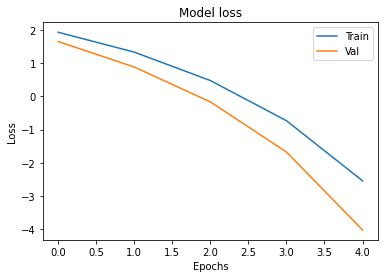

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

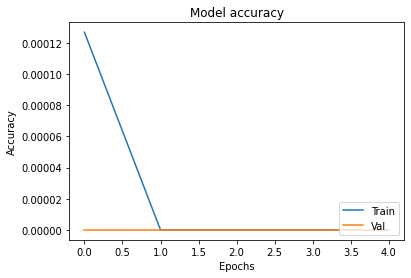

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
#from sklearn.metrics import confusion_matrix,classification_report
#import seaborn as sns
#cm=confusion_matrix(ytrain,ytest)
#ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
#ax.set_title('Confusion Matrix')
#ax.set_xlabel('y_test')
#ax.set_ylabel('y_pred')
#print(classification_report(ytrain,ytest))

In [26]:
model2=Sequential()
model2.add(hub_layer)
model2.add(Dense(64,input_dim=64, activation='relu')) #Input Neuron
model2.add(Dropout(0.3))
model2.add(Dense(32,activation='relu')) #Hidden Neuron
model2.add(Dropout(0.3))
model2.add(Dense(16,activation='relu')) #Hidden Neuron
model2.add(Dense(8,activation='relu')) #Hidden Neuron
model2.add(Dense(1,activation='sigmoid')) #ouptut layer, Using sigmoid since its a binary output
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                

In [27]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history2 = model2.fit(xtrain,ytrain,epochs=5,batch_size=150000,validation_data=(xval,yval))

Epoch 1/5
7/7 [==============================] - 4s 489ms/step - loss: 0.5792 - accuracy: 0.0318 - val_loss: 0.4894 - val_accuracy: 0.0000e+00
Epoch 2/5
7/7 [==============================] - 3s 434ms/step - loss: 0.3934 - accuracy: 2.6660e-04 - val_loss: 0.2671 - val_accuracy: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 3s 441ms/step - loss: 0.1195 - accuracy: 9.7656e-07 - val_loss: -0.0811 - val_accuracy: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 3s 436ms/step - loss: -0.3051 - accuracy: 0.0000e+00 - val_loss: -0.6256 - val_accuracy: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 3s 427ms/step - loss: -0.9531 - accuracy: 0.0000e+00 - val_loss: -1.4390 - val_accuracy: 0.0000e+00


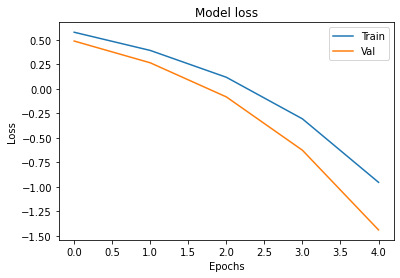

In [29]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

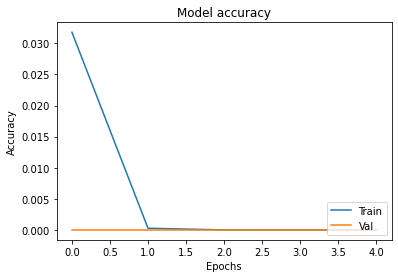

In [30]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [31]:
model3=Sequential()
model3.add(hub_layer)
model3.add(Dense(64,input_dim=64, activation='relu')) #Input Neuron
model3.add(Dense(32,activation='relu')) #Hidden Neuron
model3.add(Dense(16,activation='relu')) #Hidden Neuron
model3.add(Dropout(0.1))
model3.add(Dense(8,activation='relu')) #Hidden Neuron
model3.add(Dense(1,activation='sigmoid')) #ouptut layer, Using sigmoid since its a binary output
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [32]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history3 = model3.fit(xtrain,ytrain,epochs=5,batch_size=150000,validation_data=(xval,yval))

Epoch 1/5
7/7 [==============================] - 4s 489ms/step - loss: 0.6806 - accuracy: 0.1872 - val_loss: 0.6092 - val_accuracy: 0.0015
Epoch 2/5
7/7 [==============================] - 3s 431ms/step - loss: 0.5461 - accuracy: 7.9395e-04 - val_loss: 0.4281 - val_accuracy: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 3s 431ms/step - loss: 0.3236 - accuracy: 2.9297e-06 - val_loss: 0.1296 - val_accuracy: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 3s 429ms/step - loss: -0.0248 - accuracy: 0.0000e+00 - val_loss: -0.3297 - val_accuracy: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 3s 426ms/step - loss: -0.5671 - accuracy: 0.0000e+00 - val_loss: -1.0404 - val_accuracy: 0.0000e+00


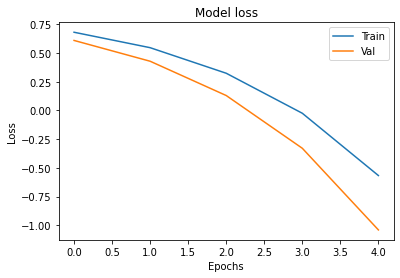

In [34]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

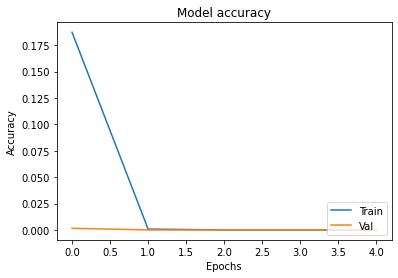

In [35]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()